# Module 6 Part 2: Goodness of Fit

This module consists of 3 parts:

- **Part 1** - ANOVA Testing

- **Part 2** - Goodness of Fit

- **Part 3** - Introduction to Bootstrapping

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-6-Part-2:-Goodness-of-Fit" data-toc-modified-id="Module-6-Part-2:-Goodness-of-Fit">Module 6 Part 2: Goodness of Fit</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#The-Chi-Square-distribution" data-toc-modified-id="The-Chi-Square-distribution">The Chi-Square distribution</a></span>
</li>
<li><span><a href="#Hypothesis-tests-on-two-or-more-proportions" data-toc-modified-id="Hypothesis-tests-on-two-or-more-proportions">Hypothesis tests on two or more proportions</a></span>
<ul class="toc-item">
<li><span><a href="#Goodness-of-fit" data-toc-modified-id="Goodness-of-fit">Goodness of fit</a></span>
</li>
<li><span><a href="#Contingency-tables" data-toc-modified-id="Contingency-tables">Contingency tables</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# The Chi-Square distribution

Often we need to analyze data classified into several groups. The technique developed for such analysis, the $\chi^2$-test (called chi-square or chi-squared) is also useful for evaluating whether the data follows a particular distribution known as a goodness-of-fit test.

Before covering goodness-of-fit and contingency tables, we need to introduce the Chi-Square ($\chi^2$) distribution:

- If $Z$ has a standard normal distribution, then $Z^2$ has a $\chi^2$ distribution with one degree of freedom.


- If $Z_1$, …, $Z_k$ are independent random variables &mdash; each with a standard normal distribution &mdash; then $𝑍_1^2 + 𝑍_2^2 + \ … \ + 𝑍_𝑘^2$ has a distribution $\chi_𝑘^2$ with $k$ degrees of freedom.

The shape of the distribution is defined by a single parameter, the number of degrees of freedom.

The $\chi_k^2$ distribution has many applications  in inference. The strength of this distribution comes from its *nonparametric* nature &mdash; no assumptions about the population are required.  

In contrast with other distributions or tests which can only handle binary outputs (e.g. Bernoulli, Binomial or ANOVA), $𝑋_𝑘^2$ can handle **multinomial outputs**, i.e. random processes with several alternative outputs, not just two.

In [1]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

import numpy as np

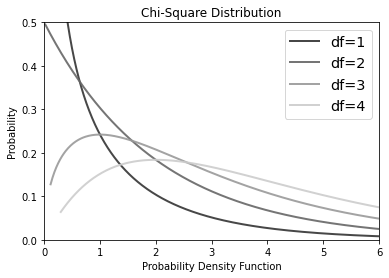

In [2]:
for i in np.arange(1,5,1):
    df = i
    color=str(i* 0.20)
    x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 1000)
    plt.plot(x, chi2.pdf(x, df),'r-', lw=2, alpha=0.9, color=color,label='df='+str(i))
    

plt.title('Chi-Square Distribution')
plt.xlabel('Probability Density Function')
plt.ylabel('Probability')
legend = plt.legend(loc='upper right', shadow=False,fontsize='x-large')
plt.axis([0, 6, 0, 0.5])
plt.show()

In the next two sections, we will use the fact that the statistic $\sum^{k}_{i=1} \frac{(O_i - E_i)^2}{O_i} $ follows a $\chi ^2$ distribution with $k$ degrees of freedom, where $O_i$ and $E_i$ are the observed and expected frequencies, respectively.

# Hypothesis tests on two or more proportions

We will now look at two tests for multi-alternative processes: **goodness-of-fit** and **contingency tables tests**, both of which use the Chi-Square distribution.

## Goodness of fit

There are situations when an experiment can produce more than two possible outcomes per trial: e.g. which brand is a person going to choose from, which candidate is a person is going to vote for, etc. This is called a **multinomial experiment**.

If each trial is independent of all the others, the outcomes are collectively exhaustive $P=\sum_{i=1}^{k}{p_i}=1$ and each $p_i$ follows a normal distribution to which we can apply the $\chi^2$ (Chi-Square) distribution.

The null hypothesis tests whether the observed $O_i$ frequency equals an expected $E_i$ frequency, so if $O_i$ and $E_i$ are close, we would not reject the null hypothesis. If they are very different, we would reject the null hypothesis and conclude that $O_i$ and $E_i$ are different. How different they have to be will depend on the shape of the distribution (i.e. the degrees of freedom) and the confidence level $\alpha$.

$$\chi ^2 = \sum^{k}_{i=1} \frac{(O_i - E_i)^2}{E_i}=\frac{(O_1 - E_1)^2}{E_1}+\frac{(O_2 - E_2)^2}{E_2}+...+\frac{(O_k - E_k)^2}{E_k} $$


where:

- $O$: observed
- $E$: expected
- $i$: $i^{th}$ observation

Let's look at some examples. Suppose that we have the following observed frequencies and we want to check if the frequencies are equal. The observed differences are random.

Here are the observed frequencies:

|1|2|3|4|5|6|
|---|---|---|---|---|---|
| 16| 18| 16| 14| 12| 12|

In [3]:
import numpy as np
from scipy.stats import chisquare
test=chisquare([16, 18, 16, 14, 12, 12])

print('Chi-square Statistic= %.2f' %test.statistic)
print('p-value= %.2f' %test.pvalue)

Chi-square Statistic= 2.00
p-value= 0.85


**NOTE**: Omitting the `f_exp` parameter to the `chisquare` function assumes that all frequencies are equal. Otherwise, a specific distribution is being specified.

###### print('The interpretation of the p-value of the test is the same as before: if the null hypothesis is true, i.e. all the frequencies are the same, the probability of obtaining our sample is',
       np.round(test.pvalue,2)*100,'%', 'thus we failed to reject the null and accept that all frequencies are the same.'
       , 'The sample does not provide enough evidence to reject the null and state the proportions are not equal.')

However, as the sample size increases, the same proportions will show as not equal. This is intuitive &mdash; as the sample gets bigger, we should expect that the sample obtained better reflects the population and the sample statistic should be closer to the true population parameter.

In [5]:
test=chisquare([160, 180, 160, 140, 120, 120])

print('Chi-square Statistic= %.2f' %test.statistic)
print('p-value= %.4f' %test.pvalue)

Chi-square Statistic= 20.00
p-value= 0.0012


In [6]:
print('Now if the null hypothesis is true, i.e. all the frequencies are the same, the probability of obtaining our sample is',
       np.round(test.pvalue,4)*100,'%', 'thus we reject the null and state that all frequencies are not the same.')

Now if the null hypothesis is true, i.e. all the frequencies are the same, the probability of obtaining our sample is 0.12 % thus we reject the null and state that all frequencies are not the same.


We are now going to compare the observed frequency against an expected one.

In [7]:
test=chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])
print('Chi-square Statistic= %.2f' %test.statistic)
print('p-value= %.2f' %test.pvalue)

Chi-square Statistic= 3.50
p-value= 0.62


In [8]:
print('If the null hypothesis is true, i.e. the observed frequencies are equivalent to the expected one, the probability of obtaining our sample is',
       np.round(test.pvalue,2)*100,'%', 'thus we fail to reject the null and state that the observed and expected frequencies are the same.')

If the null hypothesis is true, i.e. the observed frequencies are equivalent to the expected one, the probability of obtaining our sample is 62.0 % thus we fail to reject the null and state that the observed and expected frequencies are the same.


As usual, we expect the p value to be 95% or higher to reject the null hypothesis.

The goodness-of-fit test has wide applications as the expected frequencies might be from a known distribution and it can be used to test if the data is normal, lognormal, etc. Any distribution for which you can create an expected distribution can be tested using the goodness-of-fit test.

## Contingency tables

The methodology of the previous section can be extended to contingency tables.

|Gender | Right-handed | Left-handed| Total 	| 			                                         
|------------	|--------------	|-------------	|-------	| 	
| Male       	| 43           	| 9           	| 52    	|
| Female     	| 44           	| 4           	| 48    	|
| Total      	| 87           	| 13          	| 100   	|


What is the expected frequency if the proportion of right-handed people is the same as left-handed?

In [9]:
from scipy.stats import chi2_contingency
obs = np.array([[43,9], [44,4]])
chi2_contingency(obs)

(1.0724852071005921,
 0.300384770390566,
 1,
 array([[45.24,  6.76],
        [41.76,  6.24]]))

Notice the numbers in the array. They are the expected values calculated based on the original data. If there is no difference between the different categories the frequencies should match the total row and column total. In general:

$$
Expected_{row_i,column_j}=\frac{row \mbox{ } i \mbox{ } total \mbox{ } \cdot \mbox{ } column \mbox{ } j \mbox{ } total}{table \mbox{ } total}
$$

For example for row 1 and column 1:  $\frac{52\mbox{ } \cdot \mbox{ }87}{100}=45.24$, which is the number indicated in the output of `chi2_contingency(obs)`.

We can now perform the test.

In [10]:
chisquare(obs)
chisquare(obs, axis=1)

Power_divergenceResult(statistic=array([22.23076923, 33.33333333]), pvalue=array([2.41768131e-06, 7.76403654e-09]))

Based on the sample, we can conclude that the proportion of right and left-handed people are not equal.

In [11]:
chisquare([9,4])

Power_divergenceResult(statistic=1.9230769230769231, pvalue=0.16551785869746605)

**Example**

Let's explore whether a sample is representative of the general population. Consider data from a random sample of 275 jurors in a small county. Jurors identified their racial group, and we would like to determine if these jurors are racially representative of the population.

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [13]:
voters = pd.DataFrame(["white"]*72 + ["black"]*7 +\
                        ["hispanic"]*12  + ["other"]*9)
           

jury = pd.DataFrame(["white"]*205 + ["black"]*26 +\
                        ["hispanic"]*25  + ["other"]*19)

voters_table = pd.crosstab(index=voters[0], columns="count")
jury_table = pd.crosstab(index=jury[0], columns="count")

print( "Voters")
print(voters_table)
print(" ")
print( "Jury")
print(jury_table)

Voters
col_0     count
0              
black         7
hispanic     12
other         9
white        72
 
Jury
col_0     count
0              
black        26
hispanic     25
other        19
white       205


In [14]:
observed = jury_table

voters_ratios = voters_table/len(voters)  # Get population ratios

expected = voters_ratios * len(jury)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print('chi_squared_stat= %.2f' %chi_squared_stat)

chi_squared_stat= 5.89


In [15]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # Df = number of variable categories - 1

print('Critical value= %.2f' %crit)


p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=3)
print('p value= %.2f' %p_value)

Critical value= 7.81
p value= 0.12


The null hypothesis is that the jury is representative. A p-value of 0.12 does not support that the jury is not representative, so we cannot reject the null hypothesis.  The statistics value 5.89 is smaller than the critical value 7.89.

Another way:

In [16]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([5.88961039]), pvalue=array([0.11710619]))

We will repeat the calculations using Python for illustrative purposes.

In [17]:
observed

col_0,count
0,
black,26
hispanic,25
other,19
white,205


In [18]:
expected

col_0,count
0,
black,19.25
hispanic,33.00
other,24.75
white,198.00


In [19]:
chisqcont = (((observed-expected)**2)/expected)
chisqcont

col_0,count
0,
black,2.366883
hispanic,1.939394
other,1.335859
white,0.247475


In [20]:
print('Chi-square calculated manually: %.2f' %chisqcont.sum())

Chi-square calculated manually: 5.89


In [21]:

results = [["Race","Observed", "Expected","Chi Square Contribution"],
         ["Black", '%.4f' % observed.values[0], '%.4f' % expected.values[0],'%.4f' % chisqcont.values[0]],
         ["Hispanic", '%.4f' % observed.values[1], '%.4f' % expected.values[1],'%.4f' % chisqcont.values[1]],
         ["Other", '%.4f' % observed.values[2], '%.4f' % expected.values[2],'%.4f' % chisqcont.values[2]],
         ["White", '%.4f' % observed.values[3], '%.4f' % expected.values[3], '%.4f' % chisqcont.values[3]],
         ["Total", '%.4f' % observed.sum(), '%.4f' % expected.sum(), '%.4f' % chisqcont.sum()]]

print('Critical tatistic value= %.2f' %crit)
print('Observed statistic value= %.2f' %chisqcont.sum())
print('p-value= %.4f' %p_value)

Critical tatistic value= 7.81
Observed statistic value= 5.89
p-value= 0.1171


If the p-value is greater than 0.05, we fail to reject the null and conclude that the jury is representative of the population.

Let's try with a jury we know is not a good fit for the population:

In [22]:
voters = pd.DataFrame(["white"]*72 + ["black"]*7 +\
                        ["hispanic"]*12  + ["other"]*9)
           

jury = pd.DataFrame(["white"]*226 + ["black"]*5 +\
                        ["hispanic"]*25  + ["other"]*19)

voters_table = pd.crosstab(index=voters[0], columns="count")
jury_table = pd.crosstab(index=jury[0], columns="count")

observed = jury_table

voters_ratios = voters_table/len(voters)  # Get population ratios

expected = voters_ratios * len(jury)   # Get expected counts

chisqcont = (((observed-expected)**2)/expected)

p_value = 1 - stats.chi2.cdf(x=chisqcont.sum(),  # Find the p-value
                             df=3)

In [23]:
# this time we shall use 'tabletext' Python library
# to format tabular data as text tables.
# To install 'tabletext' library enter
# `pip install tabletext` in terminal command line.

import tabletext

results = [["Race","Observed", "Expected","Chi Square Contribution"],
         ["Black", '%.4f' % observed.values[0], '%.4f' % expected.values[0],'%.4f' % chisqcont.values[0]],
         ["Hispanic", '%.4f' % observed.values[1], '%.4f' % expected.values[1],'%.4f' % chisqcont.values[1]],
         ["Other", '%.4f' % observed.values[2], '%.4f' % expected.values[2],'%.4f' % chisqcont.values[2]],
         ["White", '%.4f' % observed.values[3], '%.4f' % expected.values[3], '%.4f' % chisqcont.values[3]],
         ["Total", '%.4f' % observed.sum(), '%.4f' % expected.sum(), '%.4f' % chisqcont.sum()]]

table = tabletext.to_text(results)
print('Critical tatistic value= %2f' %crit)
print('Observed statistic value= %2f' %chisqcont.sum())
print('p-value= %.4f' %p_value)

print(table)

Critical tatistic value= 7.814728
Observed statistic value= 17.783550
p-value= 0.0005
┌──────────┬──────────┬──────────┬─────────────────────────┐
│ Race     │ Observed │ Expected │ Chi Square Contribution │
├──────────┼──────────┼──────────┼─────────────────────────┤
│ Black    │ 5.0000   │ 19.2500  │ 10.5487                 │
├──────────┼──────────┼──────────┼─────────────────────────┤
│ Hispanic │ 25.0000  │ 33.0000  │ 1.9394                  │
├──────────┼──────────┼──────────┼─────────────────────────┤
│ Other    │ 19.0000  │ 24.7500  │ 1.3359                  │
├──────────┼──────────┼──────────┼─────────────────────────┤
│ White    │ 226.0000 │ 198.0000 │ 3.9596                  │
├──────────┼──────────┼──────────┼─────────────────────────┤
│ Total    │ 275.0000 │ 275.0000 │ 17.7835                 │
└──────────┴──────────┴──────────┴─────────────────────────┘


In this case, the observed values (at least one) are far from the expected. Assuming the jury's racial composition is representative of the population, the probability of the observed jury is too small (0.05) so we conclude that the sample provides enough evidence to reject the null and state that the jury does not represent the population.

**Exercise 1**

In Module 2, we simulated rolling two dice and plotted the probability distribution. We got a triangular distribution. Now, let's elaborate on this example. Suppose you are in a casino playing craps, a game where you roll two dice.  

Try to check that the dice are fair by analyzing if the numbers obtained match the expected distribution.

The values obtained are:


|Sum of Dice Roll|2|3|4|5|6|7|8|9|10|11|12|
|-|-|-|-|-|-|-|-|-|--|--|--|
|Frequency Observed|10|30|50|60|71|85|75|59|48|27|9|


From Module 2, we know the expected frequencies:


|Sum of Dice Roll|2|3|4|5|6|7|8|9|10|11|12|
|-|-|-|-|-|-|-|-|-|--|--|--|
|Frequency Expected|1/36|2/36|3/36|4/36|5/36|6/36|5/36|4/36|3/36|2/36|1/36|

In [24]:
# Your work here

**Solution**

First we need the table total:

In [25]:
observed = [10,30,50,60,71,85,75,59,48,27,9]
roll_sum = sum(observed)
roll_sum

524

In [26]:
# We calculate the expected frequencies based on the expected probabilities and the table total
expected_prob = (1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36)

# We create an numpy array to use vectorized computation
expected_prob_arr=np.array(expected_prob)
expected_freq = expected_prob_arr*roll_sum
expected_freq

exp = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])*sum(observed)

In [27]:
test_ch = stats.chisquare(observed,exp)
print ('The chi-squared test statistic is %.2f' %test_ch.statistic)
print ('The p-value for the test is %.2f' %test_ch.pvalue)

The chi-squared test statistic is 5.31
The p-value for the test is 0.87


The observed and expected frequencies are close enough, so we fail to reject the null and thus conclude the dice are fair.

**End of Part 2**

This notebook makes up one part of this module. Now that you have completed this part,
please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Keller, G. (2017). Chapter 12: Inference about a Population and Chapter 13: Inference about comparing two Populations in *Statistics for Management and Economics, 11th Edition*, Cengage Learning. ISBN 9781337093453

SciPy Community, (2018). scipy.stats.chi2_contingency. Retrieved on Dec 19, 2018 from https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

SciPy Community, (2018). scipy.stats.chisquare. Retrieved on Dec 19, 2018 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
